In [1]:
#Import Dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import CSV

training_data = pd.read_csv('NASDAQ_Stock_Price_Train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


In [3]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,100.000000
1,100.839996
2,100.760002
3,100.690002
4,101.449997


In [4]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)

In [5]:
# Getting the Inputs and Outputs

x_train = training_data[0:12606]
y_train = training_data[1:12607]

print(x_train.shape)
print(y_train.shape)

(12606, 1)
(12606, 1)


In [6]:
#Reshape 

x_train = np.reshape(x_train, (12606, 1, 1))

print(x_train.shape)

(12606, 1, 1)


In [7]:
#Importing the Keras Libraries and Packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [8]:
#Initializing the Model
model = Sequential()

#Adding the Input Layer and LSTM Layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

#Adding the Output Layer
model.add(Dense(units = 1))

#Compiling the Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting the RNN to the Training Data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
394/394 [==============================] - 4s 2ms/step - loss: 0.0428
Epoch 2/200
394/394 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 3/200
394/394 [==============================] - 1s 2ms/step - loss: 0.0167A: 0s - loss: 0
Epoch 4/200
394/394 [==============================] - 1s 2ms/step - loss: 0.0099
Epoch 5/200
394/394 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 6/200
394/394 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 7/200
394/394 [==============================] - 1s 2ms/step - loss: 3.4677e-04
Epoch 8/200
394/394 [==============================] - 1s 2ms/step - loss: 1.9500e-04
Epoch 9/200
394/394 [==============================] - 1s 2ms/step - loss: 1.8875e-04
Epoch 10/200
394/394 [==============================] - 1s 2ms/step - loss: 1.5971e-04
Epoch 11/200
394/394 [==============================] - 1s 2ms/step - loss: 1.4426e-04
Epoch 12/200
394/394 [==============================] - 1s 2m

394/394 [==============================] - 1s 2ms/step - loss: 1.3182e-05
Epoch 96/200
394/394 [==============================] - ETA: 0s - loss: 1.3503e-0 - 1s 2ms/step - loss: 1.3488e-05
Epoch 97/200
394/394 [==============================] - 1s 2ms/step - loss: 1.3355e-05
Epoch 98/200
394/394 [==============================] - 1s 2ms/step - loss: 1.2181e-05A: 0s - 
Epoch 99/200
394/394 [==============================] - 1s 2ms/step - loss: 1.1963e-05
Epoch 100/200
394/394 [==============================] - 1s 2ms/step - loss: 1.2094e-05
Epoch 101/200
394/394 [==============================] - 1s 2ms/step - loss: 1.1955e-05
Epoch 102/200
394/394 [==============================] - 1s 2ms/step - loss: 1.1986e-05
Epoch 103/200
394/394 [==============================] - 1s 2ms/step - loss: 1.1608e-05
Epoch 104/200
394/394 [==============================] - 1s 2ms/step - loss: 1.1549e-05
Epoch 105/200
394/394 [==============================] - 1s 2ms/step - loss: 1.2031e-05
Epoch 106/200


394/394 [==============================] - 1s 2ms/step - loss: 1.0867e-05
Epoch 188/200
394/394 [==============================] - 1s 2ms/step - loss: 1.0615e-05
Epoch 189/200
394/394 [==============================] - 1s 2ms/step - loss: 1.1153e-05
Epoch 190/200
394/394 [==============================] - 1s 2ms/step - loss: 1.1759e-05
Epoch 191/200
394/394 [==============================] - 1s 2ms/step - loss: 1.0909e-05
Epoch 192/200
394/394 [==============================] - 1s 2ms/step - loss: 1.0601e-05
Epoch 193/200
394/394 [==============================] - 1s 2ms/step - loss: 1.0896e-05
Epoch 194/200
394/394 [==============================] - 1s 2ms/step - loss: 1.0427e-05
Epoch 195/200
394/394 [==============================] - 1s 3ms/step - loss: 9.8328e-06
Epoch 196/200
394/394 [==============================] - 1s 3ms/step - loss: 1.0261e-05
Epoch 197/200
394/394 [==============================] - 1s 2ms/step - loss: 1.1090e-05
Epoch 198/200
394/394 [=======================

In [9]:
# Getting the real stick of 2020 (June-December) i.e., importing the test dataset

test_data = pd.read_csv('NASDAQ_Test.csv')
real_nasdaq_price = test_data.iloc[:, 1:2]
real_nasdaq_price.head()

,Open
0,9471.419922
1,9566.530273
2,9651.860352
3,9649.650391
4,9703.540039


In [10]:
#Getting the Predicted Stock Price of 2020 (June-December)

inputs = real_nasdaq_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (150, 1, 1))

predicted_nasdaq = model.predict(inputs)
predicted_nasdaq = mm.inverse_transform(predicted_nasdaq)

In [11]:
predicted_nasdaq
pd.DataFrame(predicted_nasdaq).to_csv("predicted_nasdaq.csv")

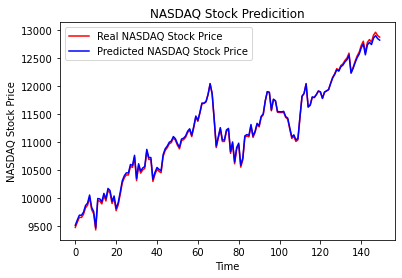

In [12]:
#Visualizing the Results

plt.plot(real_nasdaq_price, color = 'red', label = 'Real NASDAQ Stock Price')
plt.plot(predicted_nasdaq, color = 'blue', label = 'Predicted NASDAQ Stock Price')
plt.title('NASDAQ Stock Predicition')
plt.xlabel('Time')
plt.ylabel('NASDAQ Stock Price')
plt.legend()
plt.show()